### 목표 : 다중 속성 / 피쳐를 기반으로 수치값 예측
- 데이터 : fish.csv
- 피쳐 : 4개 (Length, Diagonal, Height, Width)
- 타겟 : Weight (수치값, 연속형)
- 학습유형 : 지도학습 + 회귀
- 알고리즘 : 데이터를 확인 후 결정

(1) 모듈 로딩 및 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [2]:
# 데이터 준비
data_filename = '../DATA/fish.csv'

fishDF = pd.read_csv(data_filename, nrows=35, usecols=[1, 2, 3, 4, 5])

In [3]:
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


(2) 데이터 확인

In [4]:
## 타겟과 피쳐 관계 => 상관계수, 시각화
# 매개변수 : 행 수, 열 수, 타겟, 피쳐리스트, 상관계수값
# 반환 : 없음
def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label=f'{corrs[idx]:.2f}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
corrList = fishDF.corr()['Weight'].to_list()
corrList

[1.0,
 0.9462561265460506,
 0.947135878863793,
 0.9645275374662504,
 0.9253033105453]

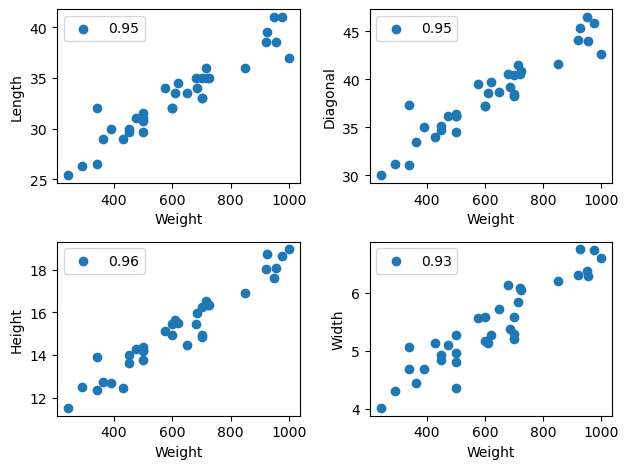

In [6]:
print_feature(2, 2, fishDF, fishDF.columns[0], fishDF.columns[1:], corrList[1:])

(3) 학습 진행 <hr>
- 학습 알고리즘 : 양의 선형관계 파악됨 => 선형 모델
- 학습 데이터 준비 : 피쳐-타겟 분리, 학습용 데이터셋 - 테스트용 데이터셋
- 피쳐 값의 범위 비교 : 작은 범위 최대값 8 ~ 큰 범위 최대값 50 => 피쳐 스케일링

(3-1) 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋 - 테스트용 데이터셋

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [8]:
# 피쳐와 타겟 분리
featureDF = fishDF[fishDF.columns[1:]]
featureDF.head()

,Length,Diagonal,Height,Width
0,25.4,30.0,11.5200,4.0200
1,26.3,31.2,12.4800,4.3056
2,26.5,31.1,12.3778,4.6961
3,29.0,33.5,12.7300,4.4555
4,29.0,34.0,12.4440,5.1340


In [9]:
targetSR = fishDF[fishDF.columns[0]]
targetSR.head()

0    242
1    290
2    340
3    363
4    430
Name: Weight, dtype: int64

In [10]:
# 데이터셋 준비 => 70:30
x_train, x_test, y_train, y_test = \
    train_test_split(featureDF, targetSR, test_size=0.3, random_state=7)

In [11]:
x_train.shape, y_train.shape

((24, 4), (24,))

In [12]:
x_test.shape, y_test.shape

((11, 4), (11,))

(3-2) 피쳐 스케일링 => 훈련 데이터로 생성

In [13]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [14]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)

MinMaxScaler()

In [15]:
rb_scaler = RobustScaler()
rb_scaler.fit(x_train)

RobustScaler()

In [16]:
# 3가지 버전에 스케일된 데이터셋 준비
std_scaled_x_train = std_scaler.transform(x_train)
std_scaled_x_test = std_scaler.transform(x_test)

mm_scaled_x_train = mm_scaler.transform(x_train)
mm_scaled_x_test = mm_scaler.transform(x_test)

rb_scaled_x_train = rb_scaler.transform(x_train)
rb_scaled_x_test = rb_scaler.transform(x_test)

(4) 학습 진행

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(std_scaled_x_train, y_train)

print(f'[모델 파라미터]\ncoef_ :{model.coef_}\nintercept_ : {model.intercept_}')

[모델 파라미터]
coef_ :[  5.81124146  56.71151617 108.02781251  28.46942271]
intercept_ : 633.9583333333335


(5) 모델 평가 <hr>
- 훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
    - 훈련 점수 >> 테스트 점수 : 과대적합 (overfitting)
    - 훈련 점수, 테스트 점수 저조 : 과소적합 (underfitting)
    - 훈련 점수 ≒ 테스트 점수 : 최적적합

In [19]:
train_score = model.score(std_scaled_x_train, y_train)
test_score = model.score(std_scaled_x_test, y_test)

print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.9546390373777777 test_score : 0.9064944670000151


In [20]:
from sklearn.model_selection import train_test_split

def test_score_by_scaler(DF, features, target, scalerList, test_size=0.3, random_state=1):
    featureDF = DF[features]    # 피쳐 추출
    targetSR = DF[target]       # 타겟 추출
    x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=test_size, random_state=random_state)

    model = LinearRegression()
    scaler_nameList = []
    train_scoreList = []
    test_scoreList = []
    modelList = []          # 서로 다른 scaler가 적용된 LinearRegression 객체 리스트
    
    for scaler in scalerList:
        scaler_name = str(type(scaler)).split('.')[3][:-2]
        scaler_nameList.append(scaler_name)
        scaler.fit(x_train)
        scaled_x_train = scaler.transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        model.fit(scaled_x_train, y_train)  # 학습 진행

        train_scoreList.append(model.score(scaled_x_train, y_train))
        test_scoreList.append(model.score(scaled_x_test, y_test))
        modelList.append(model)

    # plt.plot(scoreDict.keys(), scoreDict.values(), 'o-')
    # plt.show()
    
    print('                  train_score         test_score')
    for idx, sc_name in enumerate(scaler_nameList):
        print(f'{sc_name:15s} : {train_scoreList[idx]:.17f} {test_scoreList[idx]}')
    
    return modelList


In [21]:
test_score_by_scaler(fishDF, fishDF.columns[1:3], fishDF.columns[0], [std_scaler, mm_scaler, rb_scaler], 0.3, 70)

                  train_score         test_score
StandardScaler  : 0.91859571202629775 0.809015043030109
MinMaxScaler    : 0.91859571202629797 0.809015043030108
RobustScaler    : 0.91859571202629775 0.8090150430301091


[LinearRegression(), LinearRegression(), LinearRegression()]